# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
# 依 幼兒、童工、青年、中年、壯年、老年 區分
app_train["equal_width_age"] = pd.cut(app_train["DAYS_BIRTH"]/365, pd.IntervalIndex.from_tuples([(0, 12), (12, 18), (18, 35), (35, 50), (50, 65), (65, 100)]))
app_train["equal_width_age"].value_counts()

(35, 50]     119409
(50, 65]      95538
(18, 35]      84461
(65, 100]      8103
(12, 18]          0
(0, 12]           0
Name: equal_width_age, dtype: int64

In [10]:
app_train["equal_width_age"] = le.fit_transform(app_train["equal_width_age"])
print(app_train["equal_width_age"].value_counts())
for col in app_train:
    if app_train[col].dtype == 'int64':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) > 2:
            try:
                print("for ",col)
                print(np.corrcoef(app_train["equal_width_age"], app_train[col]))
            except:
                print("pass ",col)
            finally:
                print("-------------------------------")
print("DONE")
# plt.scatter(app_train["equal_width_age"], app_train["TARGET"])
# app_train.boxplot(column='equal_width_age', by = 'TARGET', showfliers = False, figsize=(12,12))
# plt.suptitle('')
# plt.show()

1    119409
2     95538
0     84461
3      8103
Name: equal_width_age, dtype: int64
for  SK_ID_CURR
[[1.         0.00138999]
 [0.00138999 1.        ]]
-------------------------------
for  CNT_CHILDREN
[[ 1.         -0.31495346]
 [-0.31495346  1.        ]]
-------------------------------
for  DAYS_BIRTH
[[1.      0.94035]
 [0.94035 1.     ]]
-------------------------------
for  DAYS_ID_PUBLISH
[[ 1.        -0.2864399]
 [-0.2864399  1.       ]]
-------------------------------
for  REGION_RATING_CLIENT
[[ 1.         -0.01100364]
 [-0.01100364  1.        ]]
-------------------------------
for  REGION_RATING_CLIENT_W_CITY
[[ 1.         -0.00965915]
 [-0.00965915  1.        ]]
-------------------------------
for  HOUR_APPR_PROCESS_START
[[ 1.         -0.08196488]
 [-0.08196488  1.        ]]
-------------------------------
for  equal_width_age
[[1. 1.]
 [1. 1.]]
-------------------------------
DONE


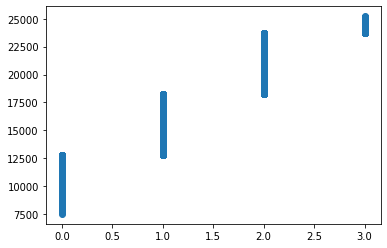

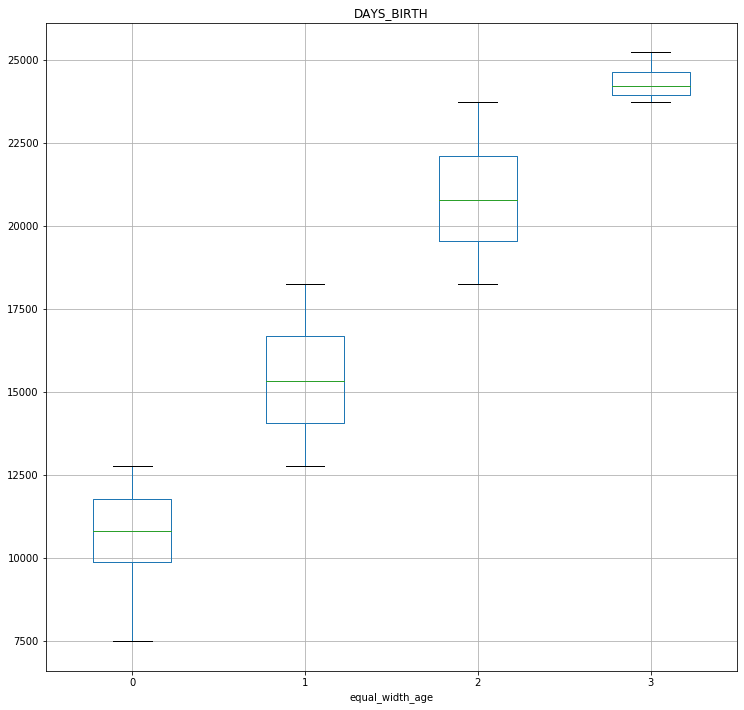

In [16]:
# 與原欄位DAYS_BIRTH的相關係數只有0.94，這代表著這種分組方式，不能夠很好的代表母體數據，或許可以嘗試去找更好的分組方式
plt.scatter(app_train["equal_width_age"], app_train["DAYS_BIRTH"])
app_train.boxplot(column='DAYS_BIRTH', by = 'equal_width_age', showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

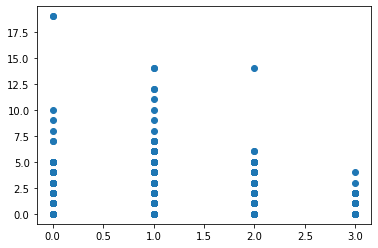

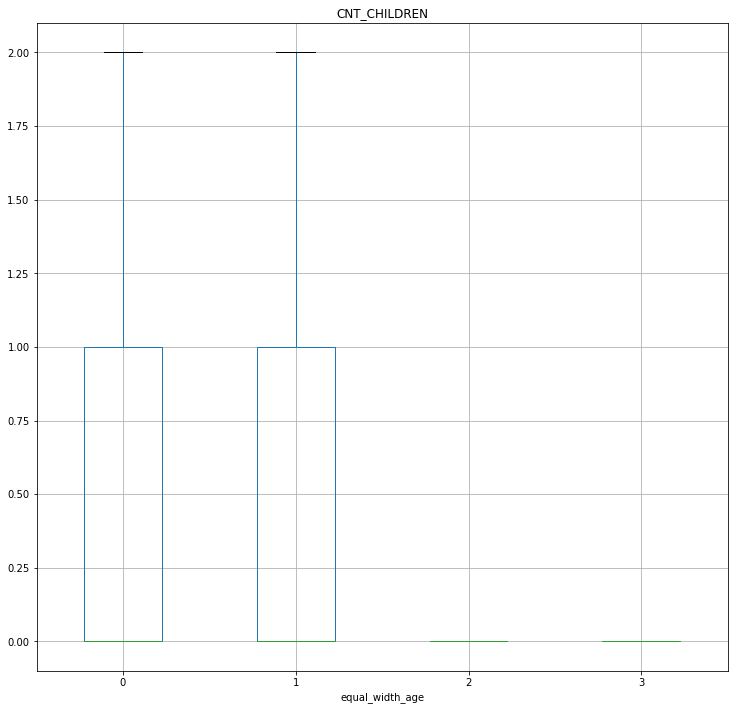

In [17]:
# 與 CNT_CHILDREN 有微弱的負相關
plt.scatter(app_train["equal_width_age"], app_train["CNT_CHILDREN"])
app_train.boxplot(column='CNT_CHILDREN', by = 'equal_width_age', showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()